In [1]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
xp = cp if poppy.accel_math._USE_CUPY else np

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = False

import warnings
warnings.filterwarnings("ignore")

from prop_models import compact2, agpm
reload(compact2)

from wfsc_1dm import utils

from imshows import *

wavelength_c = 750e-9*u.m

In [42]:
np.float64(xp.sum(c.PUPIL))

51468.0

1024 1024


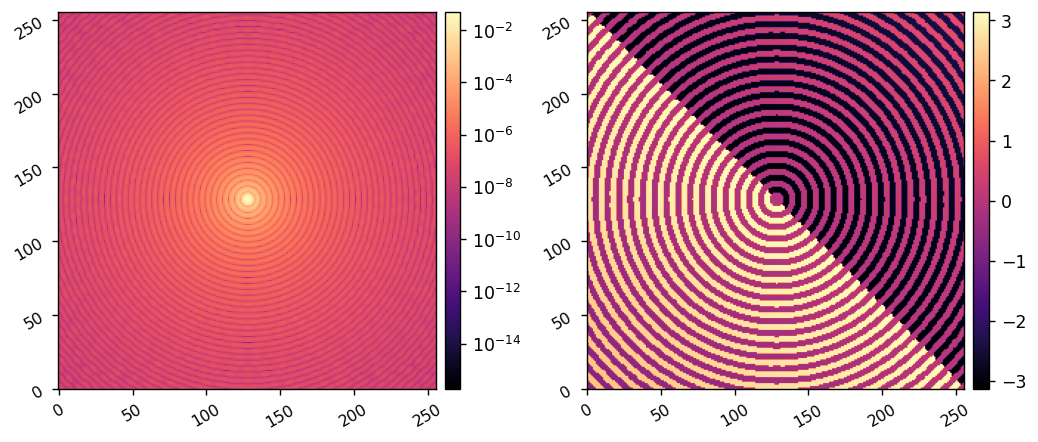

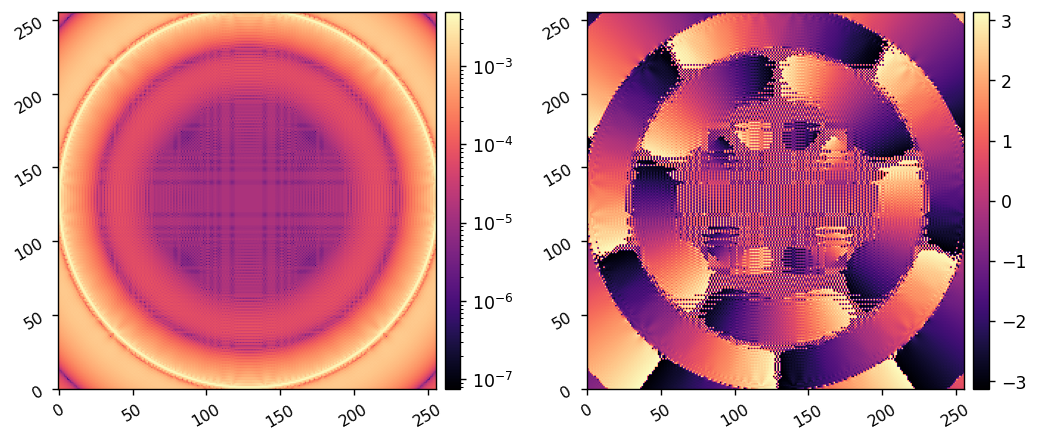

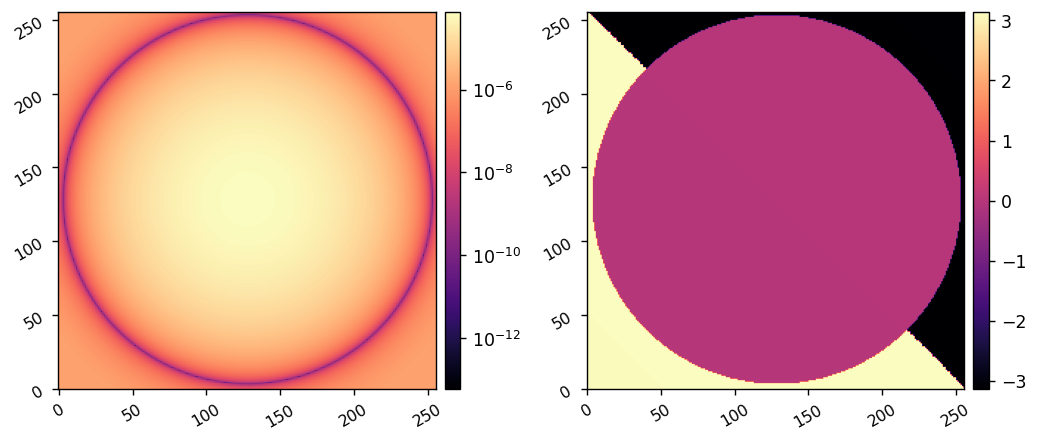

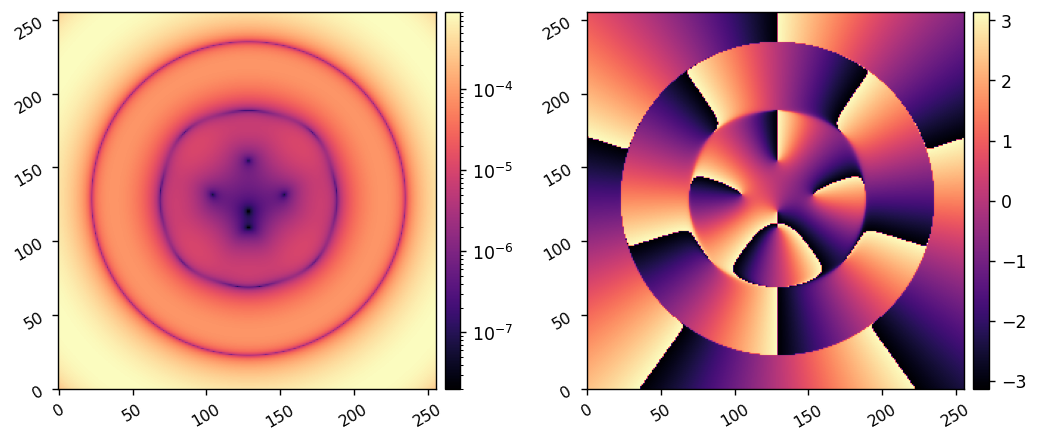

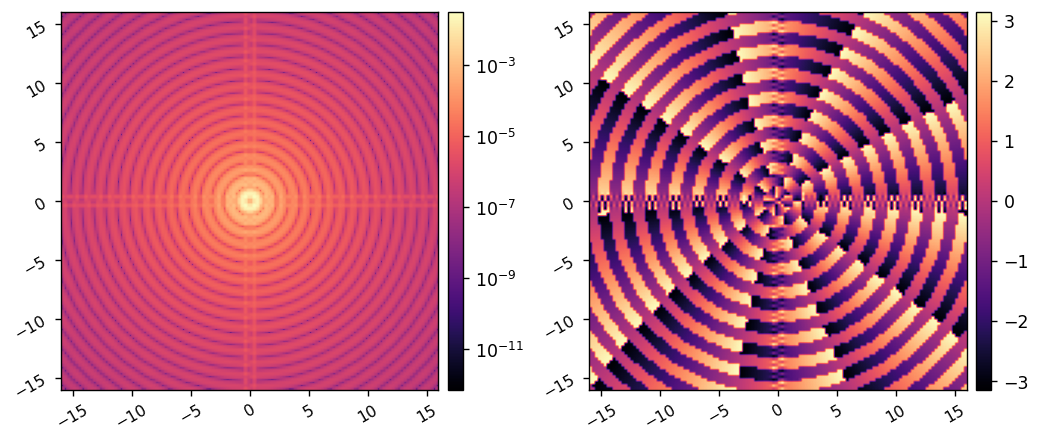

In [75]:
poppy_log.disabled = True

reload(compact2)
c = compact2.CORO()

c.npix = 256
c.oversample = 4
c.psf_pixelscale_lamD = 0.25
c.npsf = 128
c.CHARGE = 5
# c.norm = 100
# c.set_dm(np.random.randn(c.Nact,c.Nact)*2e-8)

c.USE_FPM = False
c.USE_FPM = True

c.propagate()
imshow2(xp.abs(c.wavefront)**2, xp.angle(c.wavefront),pxscl=c.psf_pixelscale_lamD, lognorm1=True)


In [ ]:
import scipy
scipy.signal.tukey()

In [64]:
xp.linspace(-1024/2, 1024/2, 1024), xp.arange((-1024+1)/2, (1024+1)/2)

(array([-512.        , -510.99902248, -509.99804497, ...,  509.99804497,
         510.99902248,  512.        ]),
 array([-511.5, -510.5, -509.5, ...,  509.5,  510.5,  511.5]))